## Fine-tune for the case study
The case study is first split into train and validation sets. Then, the training set is randomly split into 10, 50, 10, 150, 200, 250, whole amounts for fine-tuning our pre-trained MAX. The fine-tuned models are compared in the validation set. 

In [27]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
for target in ["CaCO3", "TOC"]:
    train = pd.read_csv(f"../data/finetune/{target}%/test/info_train.csv")
    val = pd.read_csv(f"../data/finetune/{target}%/test/val.csv")
    print(target)
    print(f"training: {len(train)}")
    print(f"val:{len(val)}")

CaCO3
training: 316
val:78
TOC
training: 317
val:79


In [15]:
annotation_files=[
    'info_10.csv',
    'info_50.csv',
    'info_100.csv',
    'info_150.csv',
    'info_200.csv',
    'info_250.csv',
    'info_train.csv'
]

rows = []

for target in ["CaCO3", "TOC"]:
    if target == "CaCO3":
        data_no_ls = [10, 50, 100, 150, 200, 250, 316]
    elif target == "TOC":
        data_no_ls = [10, 50, 100, 150, 200, 250, 317]

    if len(annotation_files) != len(data_no_ls):
        print("The number of annotation files and data splits do not match.")
        exit()

    for i in range(len(annotation_files)):
        txt_dir = glob.glob(f"../results/finetune_data_amount_case/{target}-{annotation_files[i]}*/{target}.txt")
        
        if len(txt_dir) == 1:
            txt = txt_dir[0]
        else:
            print(f"Error: {len(txt_dir)} txt files found for {annotation_files[i]}")
            exit()

        with open(txt, "r") as f:
            words = f.readline().split()
            r_square = float(words[-1])
            rows.append([target, data_no_ls[i], r_square])
rows.insert(0, ["CaCO3", 0, 0.975])
rows.insert(8, ["TOC", 0, 0.018])

df = pd.DataFrame(rows, columns=["target", "data_no", "r2_ft"])
df


,target,data_no,r2_ft
0,CaCO3,0,0.975
1,CaCO3,10,0.957
2,CaCO3,50,0.986
3,CaCO3,100,0.986
4,CaCO3,150,0.988
5,CaCO3,200,0.988
6,CaCO3,250,0.989
7,CaCO3,316,0.990
8,TOC,0,0.018
9,TOC,10,0.561


In [23]:
df.to_csv("../files/finetune_data_amount_case.csv")

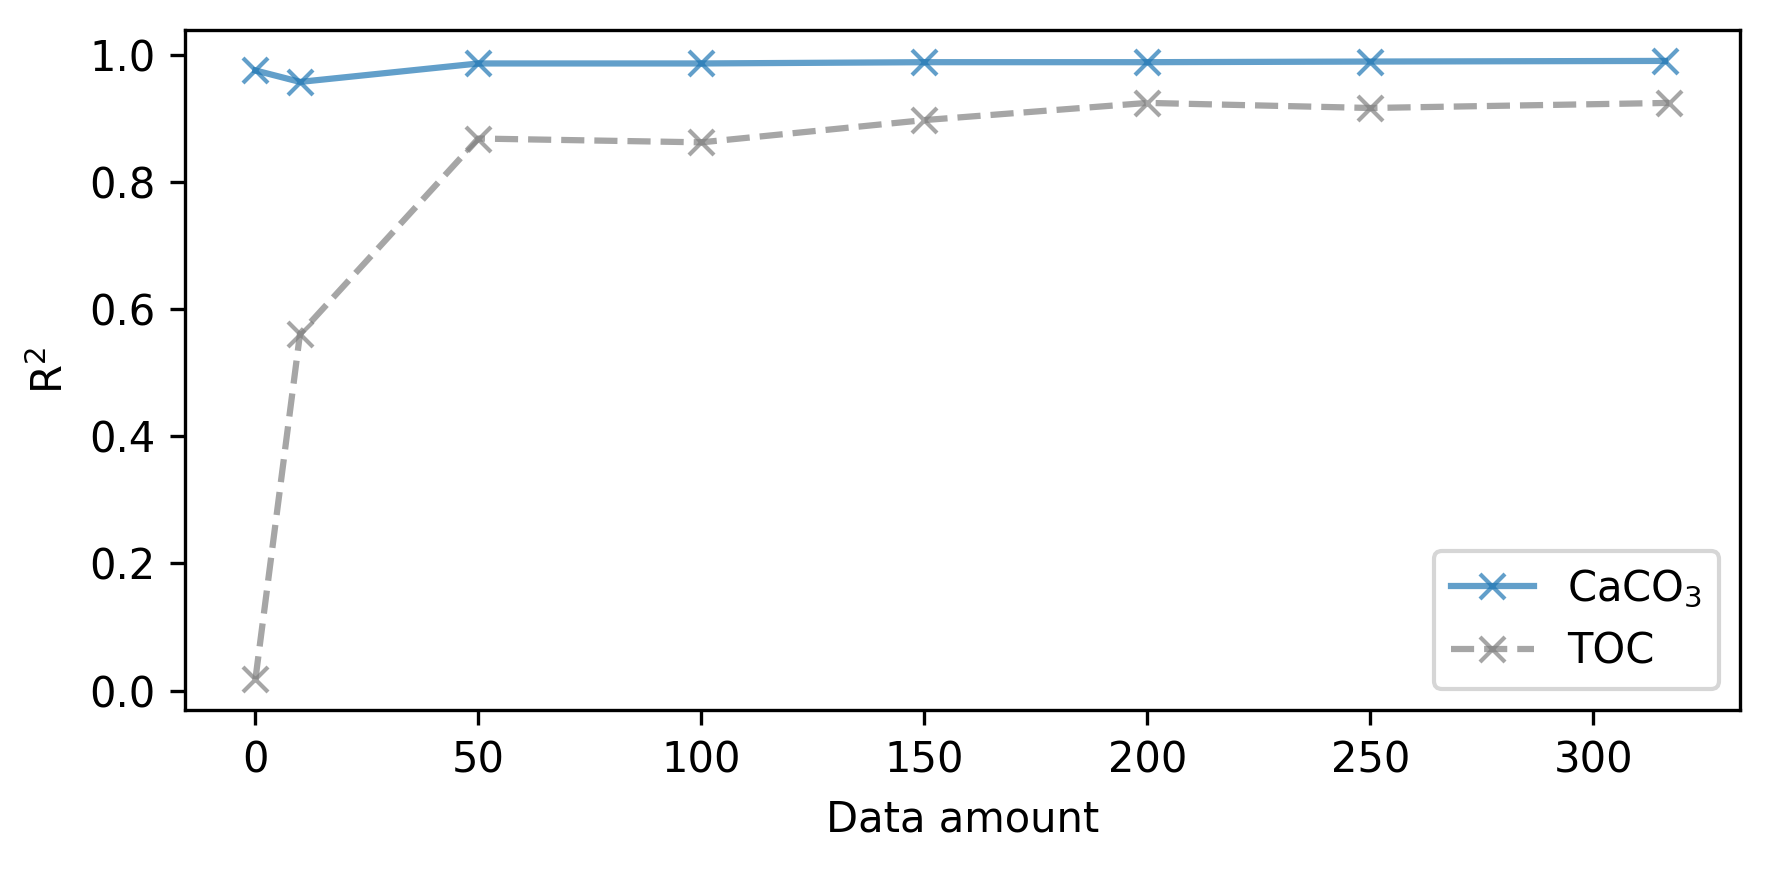

In [24]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)

ax.plot(
    df.loc[df["target"] == "CaCO3", "data_no"], df.loc[df["target"] == "CaCO3", "r2_ft"], 
    label="CaCO$_3$", marker="x", alpha=0.7
    )
ax.plot(
    df.loc[df["target"] == "TOC", "data_no"], df.loc[df["target"] == "TOC", "r2_ft"], 
    label="TOC", marker="x", ls="--", c="gray", alpha=0.7
    )

ax.set_xlabel("Data amount")

ax.legend()
ax.set_ylabel("R$^2$")
plt.tight_layout()

## Double check how dataset looks

In [39]:
target = "TOC"
subset = "test"
train_df = pd.read_csv(f"../data/finetune/{target}%/{subset}/info_train.csv")
val_df = pd.read_csv(f"../data/finetune/{target}%/{subset}/val.csv")
train_10_df = pd.read_csv(f"../data/finetune/{target}%/{subset}/info_10.csv")

y_train = []
for csv in train_df.dirname:
    measurement = np.loadtxt(f"../data/finetune/{target}%/{subset}/target/{csv}", delimiter=",", dtype=float)
    y_train.append(measurement)

y_val = []
for csv in val_df.dirname:
    measurement = np.loadtxt(f"../data/finetune/{target}%/{subset}/target/{csv}", delimiter=",", dtype=float)
    y_val.append(measurement)

y_train_10 = []
for csv in train_10_df.dirname:
    measurement = np.loadtxt(f"../data/finetune/{target}%/{subset}/target/{csv}", delimiter=",", dtype=float)
    y_train_10.append(measurement)

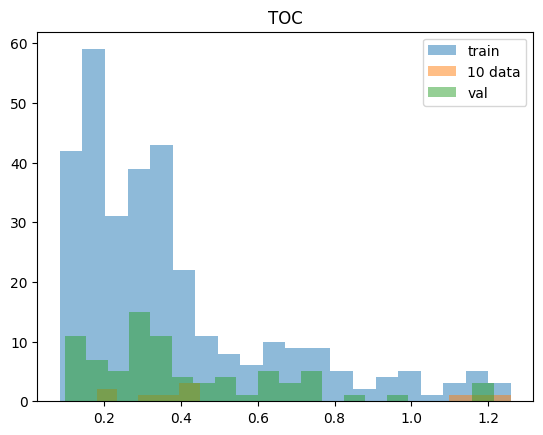

In [41]:
plt.title(target)
plt.hist(y_train, bins=20, alpha=0.5, label="train")
plt.hist(y_train_10, bins=20, alpha=0.5, label="10 data")
plt.hist(y_val, bins=20, alpha=0.5, label="val")
plt.legend();